In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, metrics

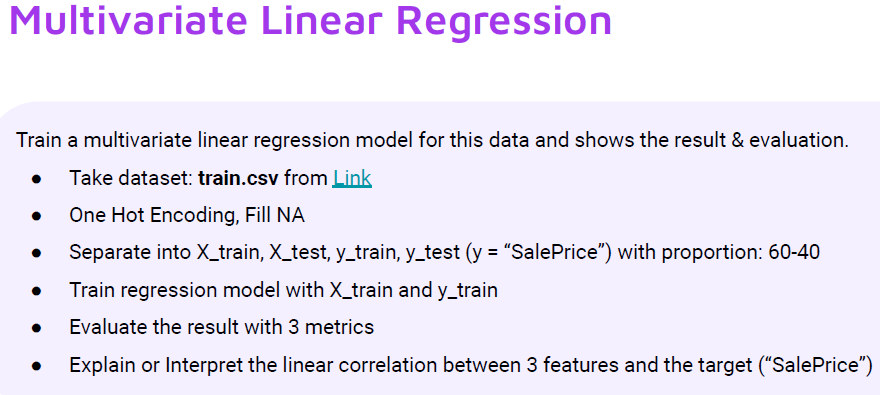

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
kolom= df.columns
print(len(kolom))

81


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
#Check missing values
null_cols = [col for col in df.columns if df[col].isnull().sum() > 1640/2]
null_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [29]:
#Handle Missing Values Fill NA
#Fill missing values with Mean/Median and Mode
df_update = df.copy()

#Missing values numerical data
df_update['LotFrontage'] = df_update['LotFrontage'].fillna(df_update['LotFrontage'].median())
df_update['MasVnrArea'] = df_update['MasVnrArea'].fillna(df_update['MasVnrArea'].median())
df_update['GarageYrBlt'] = df_update['GarageYrBlt'].fillna(df_update['GarageYrBlt'].median())

#Missing values categorical data
df_update['MasVnrType'] = df_update['MasVnrType'].fillna(df_update['MasVnrType'].mode()[0])
df_update['BsmtQual'] = df_update['BsmtQual'].fillna(df_update['BsmtQual'].mode()[0])
df_update['BsmtCond'] = df_update['BsmtCond'].fillna(df_update['BsmtCond'].mode()[0])
df_update['BsmtExposure'] = df_update['BsmtExposure'].fillna(df_update['BsmtExposure'].mode()[0])
df_update['BsmtFinType1'] = df_update['BsmtFinType1'].fillna(df_update['BsmtFinType1'].mode()[0])
df_update['BsmtFinType2'] = df_update['BsmtFinType2'].fillna(df_update['BsmtFinType2'].mode()[0])
df_update['Electrical'] = df_update['Electrical'].fillna(df_update['Electrical'].mode()[0])
df_update['FireplaceQu'] = df_update['FireplaceQu'].fillna(df_update['FireplaceQu'].mode()[0])
df_update['GarageType'] = df_update['GarageType'].fillna(df_update['GarageType'].mode()[0])
df_update['GarageFinish'] = df_update['GarageFinish'].fillna(df_update['GarageFinish'].mode()[0])
df_update['GarageQual'] = df_update['GarageQual'].fillna(df_update['GarageQual'].mode()[0])
df_update['GarageCond'] = df_update['GarageCond'].fillna(df_update['GarageCond'].mode()[0])

In [30]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [32]:
#One Hot Encoding
df = pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [33]:
#Splitting Dataset
X = df.drop(['Id', 'SalePrice'], axis = 1)
y = df['SalePrice']

In [34]:
#Separate into X_train, X_test, y_train, y_test (y = “SalePrice”) with proportion: 60-40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)

In [36]:
#Train regression model
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

print('Coefficients: ', reg.coef_)

print('Intercept: ', reg.intercept_)

Coefficients:  [-1.60141824e+02  4.60458423e+01  1.07557924e+00  5.08716564e+03
  6.14302855e+03  2.46543032e+02  2.25013926e+01  1.29605063e+01
  1.95440536e+01  8.02821444e-01 -6.49155978e-01  1.96977048e+01
  1.57390458e+01  2.87122136e+01 -7.08088935e+00  3.73703358e+01
 -1.14444163e+02  2.57640824e+03  4.12078910e+03  2.82967041e+03
 -1.86128446e+03 -1.15253851e+04 -4.89078790e+02  5.50502073e+03
 -1.63583071e+01  4.75820390e+03  1.77884783e+01  8.89650941e+00
  2.24262600e+01 -2.56729579e+00  1.62328543e+01  1.91705240e+01
  3.93560414e+01  4.80128518e-01 -3.38226864e+02 -7.51896919e+02
 -3.53437871e+04  1.74250848e+04  1.63488684e+04  2.43969654e+02
  1.32586421e+03  1.70143008e+03 -1.70143008e+03  1.71886190e+03
  3.76462092e+02 -4.29053252e+03  2.19520853e+03  1.16228922e+03
  1.15569843e+04 -1.79204720e+04  5.20119849e+03  2.44040600e+04
 -2.44040600e+04  2.11699516e+03  7.33784323e+03 -8.52951870e+02
 -7.50306684e+03 -1.09881968e+03  2.42941011e+04  2.68665593e+04
 -5.116066

In [37]:
##Evaluate the result with 3 metrics
y_pred = reg.predict(X_test)

In [38]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

20298.52034649302

In [39]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

43869.85316731822

In [40]:
# R Squared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7088219146718726

In [52]:
#the linear correlation between 3 features and the target (“SalePrice”)
correlations = df.corr()['SalePrice'].sort_values()

print('Most Positive Correlations: \n', correlations.tail(4))
print('\nMost Negative Correlations: \n', correlations.head(3))

Most Positive Correlations: 
 GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64

Most Negative Correlations: 
 ExterQual_TA     -0.589044
KitchenQual_TA   -0.519298
BsmtQual_TA      -0.452394
Name: SalePrice, dtype: float64


In [53]:
df_corr = df[['SalePrice', 'BsmtQual_TA', 'KitchenQual_TA', 'ExterQual_TA', 'OverallQual']]
df_data_corrs = df_corr.corr()
df_data_corrs

,SalePrice,BsmtQual_TA,KitchenQual_TA,ExterQual_TA,OverallQual
SalePrice,1.000000,-0.452394,-0.519298,-0.589044,0.790982
BsmtQual_TA,-0.452394,1.000000,0.447369,0.543294,-0.497957
KitchenQual_TA,-0.519298,0.447369,1.000000,0.671600,-0.553891
ExterQual_TA,-0.589044,0.543294,0.671600,1.000000,-0.646247
OverallQual,0.790982,-0.497957,-0.553891,-0.646247,1.000000


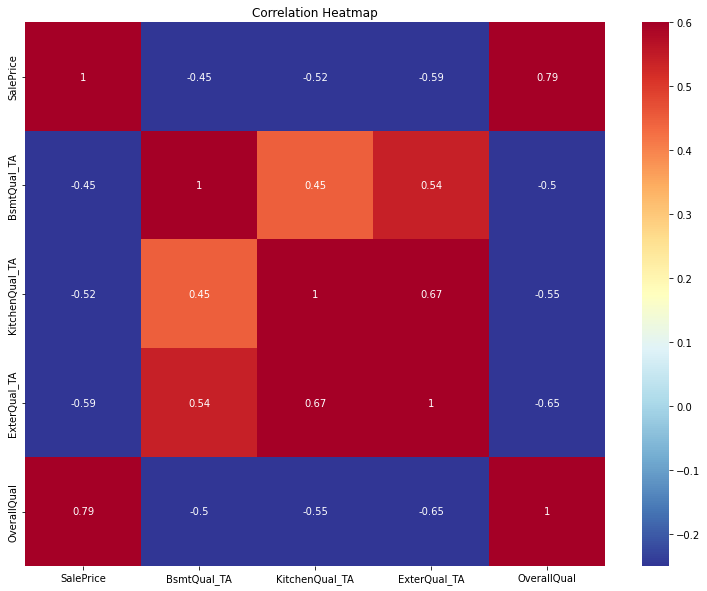

In [57]:
plt.figure(figsize = (13, 10))

sns.heatmap(df_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

plt.title('Correlation Heatmap');

Terlihat bahwa dua variabel yang memiliki korelasi tinggi adalah 'SalePrice' dan 'OverallQual'. Hal ini masuk akal karena, semakin baik kualitas bahan yang digunakan untuk membangun properti maka semakin tinggi pula harga jual properti tersebut.


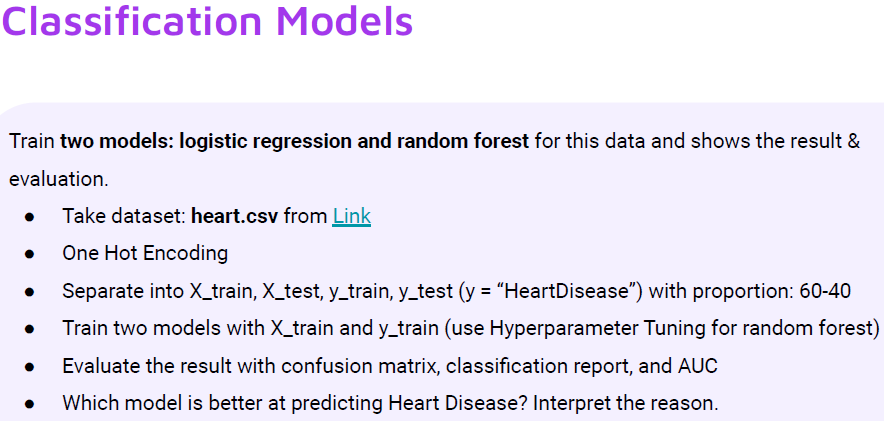

In [41]:
df2 = pd.read_csv('heart.csv')
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Dari data info di atas, tidak ada missing value

In [44]:
#One Hot Encoding
df2 = pd.get_dummies(df2)
df2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [46]:
#Splitting Dataset
X2 = df2.drop(['HeartDisease'], axis = 1)
y2 = df2['HeartDisease']

In [47]:
#Separate into X_train, X_test, y_train, y_test (y = “SalePrice”) with proportion: 60-40
from sklearn.model_selection import train_test_split
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X2, y2, test_size=0.4,random_state=1)

In [67]:
#Train  models use Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_df2, y_train_df2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [48]:
#Train  models use Hyperparameter Turning 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [49]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [51]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train_df2, y_train_df2)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [58]:
grid_search.best_score_

0.8708611022955675

In [60]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train_df2, y_train_df2)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [61]:
#Random Forest Classifer
classifier_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50, n_jobs=-1, random_state=40)

In [63]:
classifier_rf.fit(X_train_df2, y_train_df2)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=40)

In [81]:
#Evaluation
y_lr = lr.predict(X_test_df2) #Logistic Regression
y_rf_before = classifier_rf.predict(X_test_df2) # Random Forest Before
y_rf_after = rf_best.predict(X_test_df2) #Random Forest After Hyperparameter Turning

In [82]:
#confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_df2, y_lr))#Logistic Regression
print(confusion_matrix(y_test_df2, y_rf_before))# Random Forest Before
print(confusion_matrix(y_test_df2, y_rf_after))#Random Forest After Hyperparameter Turning

[[135  18]
 [ 28 187]]
[[129  24]
 [ 20 195]]
[[127  26]
 [ 20 195]]


In [85]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test_df2, y_lr))#Logistic Regression
print(classification_report(y_test_df2, y_rf_before))# Random Forest Before
print(classification_report(y_test_df2, y_rf_after))#Random Forest After Hyperparameter Turning

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       153
           1       0.91      0.87      0.89       215

    accuracy                           0.88       368
   macro avg       0.87      0.88      0.87       368
weighted avg       0.88      0.88      0.88       368

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       153
           1       0.89      0.91      0.90       215

    accuracy                           0.88       368
   macro avg       0.88      0.88      0.88       368
weighted avg       0.88      0.88      0.88       368

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       153
           1       0.88      0.91      0.89       215

    accuracy                           0.88       368
   macro avg       0.87      0.87      0.87       368
weighted avg       0.87      0.88      0.87       368



In [84]:
#AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_df2, y_lr, pos_label=1) #Logistic Regression
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test_df2, y_rf_before, pos_label=1) # Random Forest Before
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test_df2, y_rf_after, pos_label=1) #Random Forest After Hyperparameter Turning
print(auc(fpr, tpr))

0.8760601915184678
0.8750569995440036
0.8685210518315852


Sesuai dari hasil di atas, dapat disimpulkan model yang lebih baik digunakan dalam memprediksi pasien  "Heart Disease" adalah **Random Forest**.



Karena Setelah melakukan beberapa evaluasidengan 3 metrik (confusion matrix, klasifikasi laporan, dan AUC),  bahwa hasil prediksi dengan model 'Random Forest' memiliki nilai tertinggi.

